In [1]:
# Load libraries
suppressMessages(library(Seurat))
suppressMessages(library(scales))
suppressMessages(library(data.table))
suppressMessages(library(tidyverse))
suppressMessages(library(viridis))
suppressMessages(library(grid))
suppressMessages(library(patchwork))

In [2]:
library(future)
#for 200gb ram 
options(future.globals.maxSize = 200000 * 1024^2)

In [3]:
rc.integrated <- readRDS("../data/integrations/rc.integrated_14S_BR_Li_seu3_clean.rds")

In [4]:
gene_names <- read.csv("./data/features.tsv.gz", sep="\t", header=FALSE)

In [5]:
table(rc.integrated$time_trt, rc.integrated$sample)

             
              sc_1 sc_2 sc_43 sc_44 sc_45 sc_46 sc_47 sc_48 sc_49 sc_5 sc_50
              9759    0     0     0     0     0     0     0     0    0     0
  0.5_hour_BL    0    0     0  6843     0     0     0     0     0    0     0
  1_hour_BL      0    0     0     0  6336     0     0     0     0    0     0
  2_hour_BL      0    0     0     0     0  6847     0     0  5638 9790     0
  4_hour_BL      0    0     0     0     0     0  6907     0     0    0     0
  8_hour_BL      0    0     0     0     0     0     0  6389     0    0     0
  BRZ            0 7512  8874     0     0     0     0     0     0    0  5087

In [6]:
# subset the samples sc_43-sc_50 from the BR time course 

rc.integrated <- subset(rc.integrated, subset = sample %in% c("sc_43",
                                                                  "sc_44",
                                                                  "sc_45",
                                                                  "sc_46",
                                                                  "sc_47",
                                                                  "sc_48",
                                                                  "sc_49",
                                                                  "sc_50"))

In [32]:
rc.integrated$time_trt <- factor(rc.integrated$time_trt, levels=c("BRZ", "0.5_hour_BL", "1_hour_BL", "2_hour_BL" , "4_hour_BL" , "8_hour_BL"))
rc.integrated$time_trt <- fct_recode(rc.integrated$time_trt, 
           BRZ = "BRZ", 
           `BL 0.5 hour` = "0.5_hour_BL", 
          `BL 1 hour` = "1_hour_BL", 
          `BL 2 hour` = "2_hour_BL", 
          `BL 4 hour` = "4_hour_BL", 
          `BL 8 hour` = "8_hour_BL", )

In [33]:
# subset only Atrichoblast 

Atrichoblast <- subset(rc.integrated, subset = cell_type %in% c("Atrichoblast"))

In [34]:
#function for tile heatmaps

plth <- function(x, y, gene_name, title){
    data <- expand.grid(X=x, Y=y)
    z <- c()
    for (i in 1:nrow(data)) {
        idx <- which(Atrichoblast$time_trt == data$X[i] & Atrichoblast$time_zone == data$Y[i])
        z <- c(z, mean(Atrichoblast@assays$SCT@data[gene_name, idx]))
        }
    data$Z <- z
    gene_name_id <- paste0(gene_names$V2[which(gene_names$V1==gene_name)]," (",gene_name,")")
    # Color Brewer palette
    gg <- ggplot(data, aes(X, Y, fill= Z)) + 
      geom_tile() +
      scale_fill_viridis(discrete=FALSE) +
      labs(title=title,fill = "Expression") + xlab("") + ylab("")+ 
      theme_classic() + theme(axis.text.x = element_text(size=16, angle=60, hjust=1), axis.text.y = element_text(size=16)) + theme(plot.title = element_text(hjust = 0.5, size=18), 
                                                                                                                                   legend.title = element_text(size=18), 
                                                                                                                                  legend.text = element_text(size=16), 
                                                                                                                                  legend.key.width= unit(1, 'cm'))
    print(gg)
    }

In [35]:
# data
x <- c("BRZ", "BL 0.5 hour", "BL 1 hour", "BL 2 hour" , "BL 4 hour" , "BL 8 hour")
y <- c("Proliferation Domain", "Transition Domain", "Elongation", "Maturation")

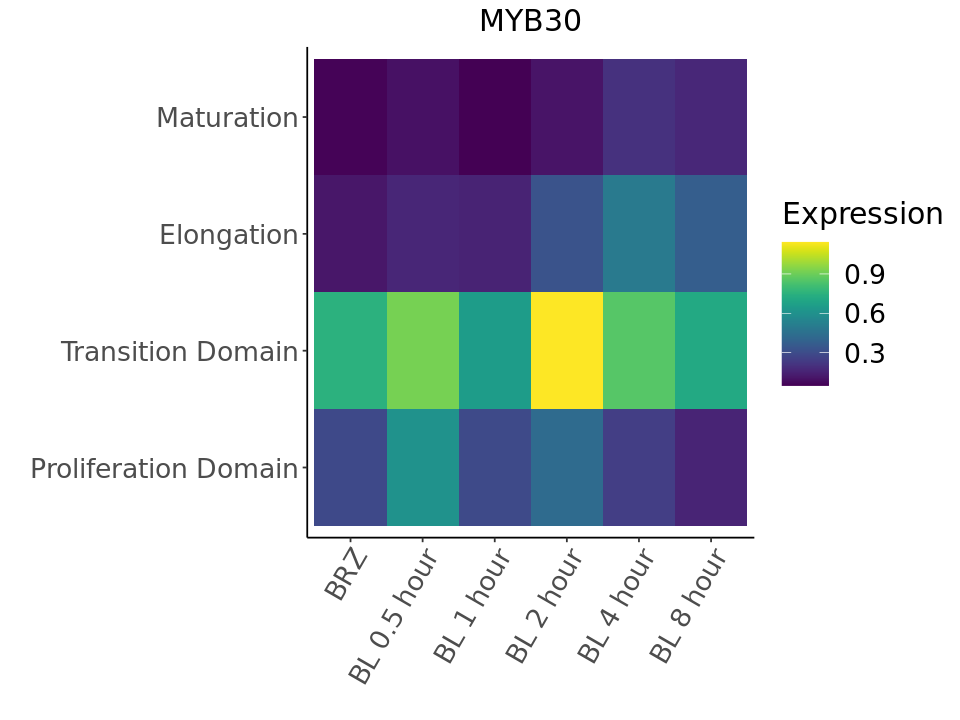

In [36]:
options(repr.plot.width=8, repr.plot.height=6)

# MYB30
MYB30 <- plth(x,y,gene_name="AT3G28910", title="MYB30")

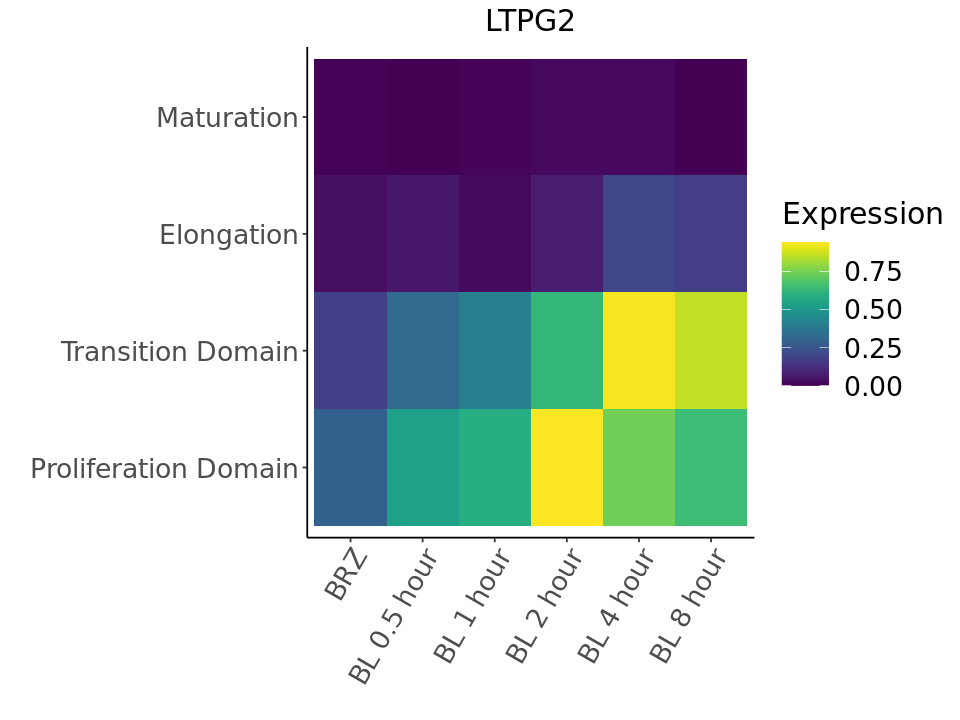

In [37]:
options(repr.plot.width=8, repr.plot.height=6)

## LTPG2

LTPG2 <- plth(x,y,gene_name="AT3G43720", title="LTPG2")

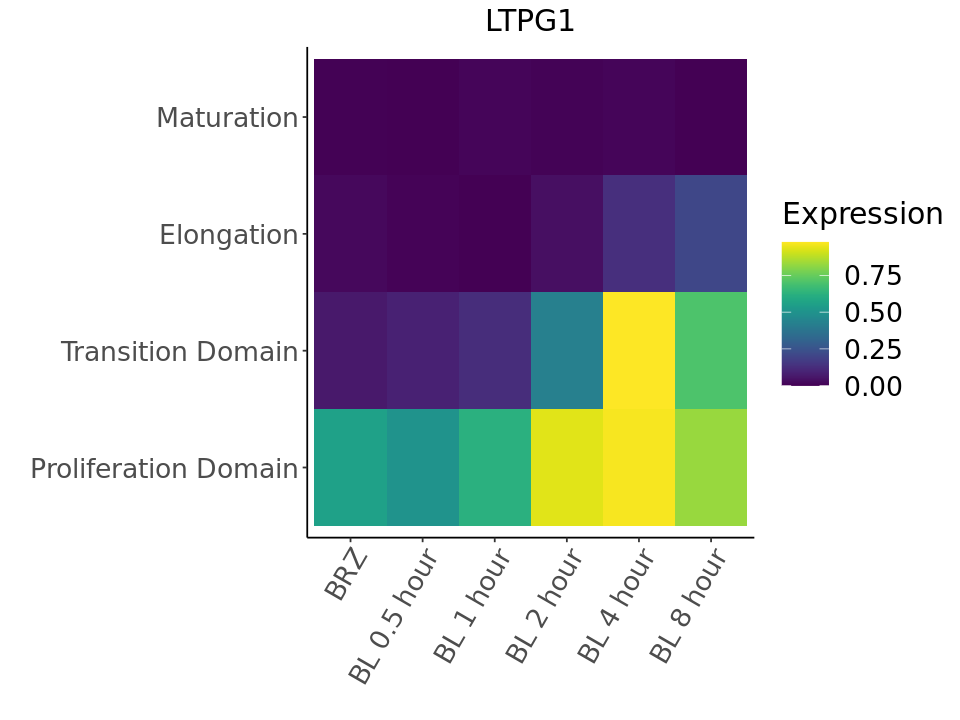

In [38]:
options(repr.plot.width=8, repr.plot.height=6)

## LTPG1

LTPG1 <- plth(x,y,gene_name="AT1G27950", title="LTPG1")

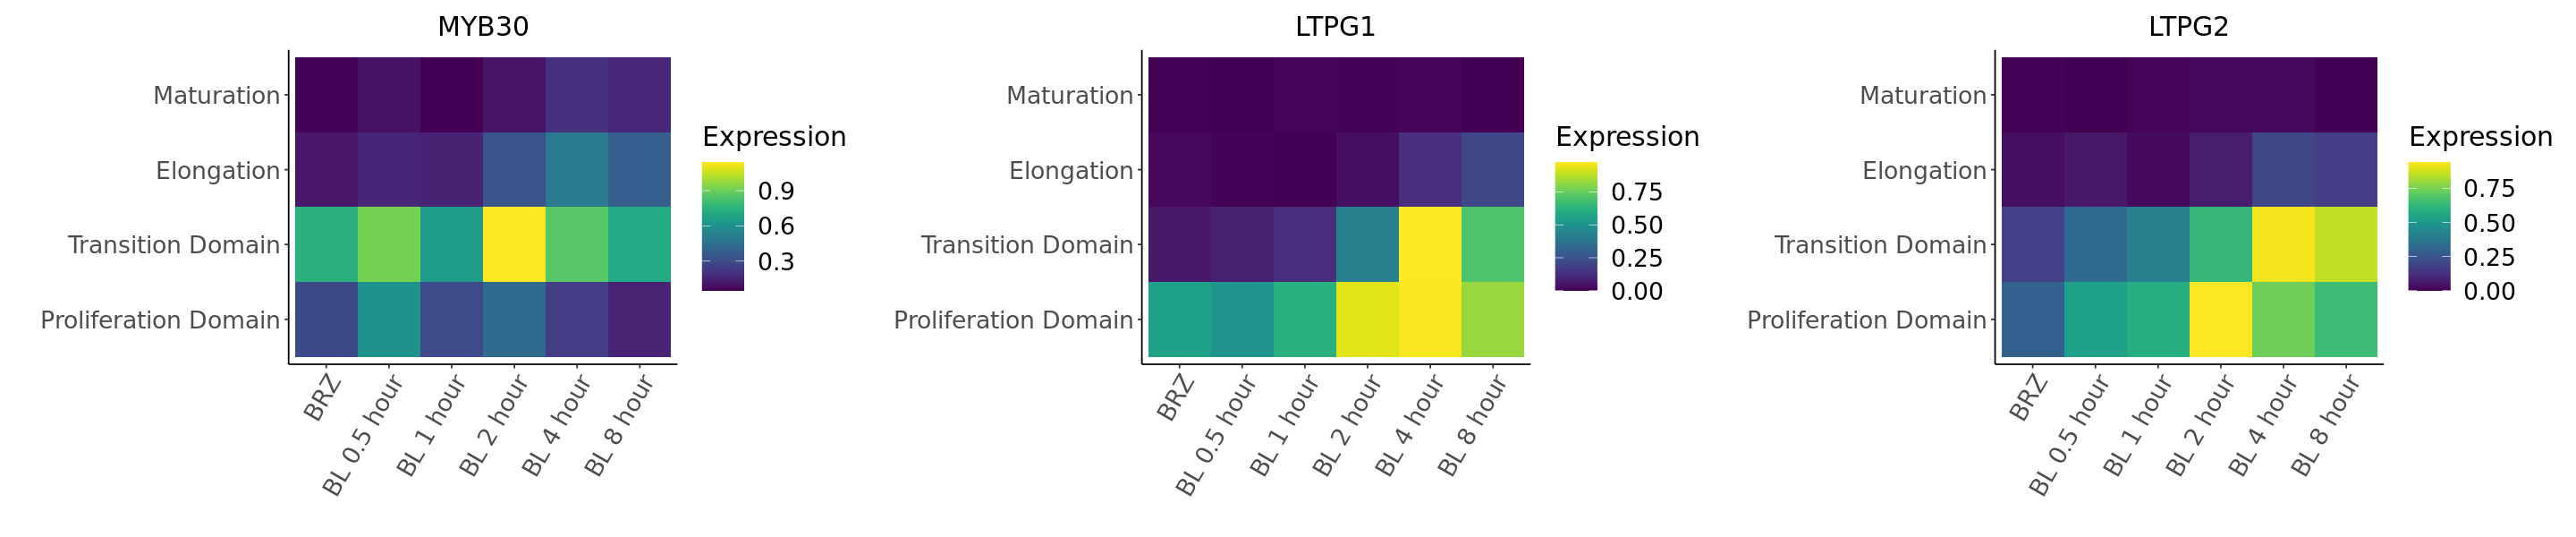

In [39]:
options(repr.plot.width=24, repr.plot.height=5)

MYB30 + LTPG1 + LTPG2 + plot_layout(nrow=1)
ggsave("./output/MYB30_and_targets_Atrichoblast_dev_time_hms.pdf", width=24, height=6)